<a href="https://colab.research.google.com/github/sjhd1109/study/blob/main/credit_binning_210227.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
package_version(R.version)

[1] ‘4.0.4’

In [ ]:
install.packages("Information")
install.packages("scorecard")
install.packages("ggridges")
install.packages("woe")
install.packages("writexl")
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘openxlsx’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(readxl)
library(data.table)
library(dplyr)
library(scorecard)
library(ggplot2)
library(ggridges)
library(woe)
library(Information)
library(caret)
library(writexl)

Loading required package: lattice



In [ ]:
cr_dt <- fread('/content/sample_data/credit_1.csv')
head(cr_dt)

good.bad,checking,duration,history,purpose,amount,savings,employed,installp,martial,⋯,resident,property,age,other,housing,existcr,job,depends,telephon,foreign
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,9,5,3,1919,1,4,4,3,⋯,3,3,35,3,1,1,3,1,2,1
2,1,18,3,1,1216,1,2,4,2,⋯,3,3,23,3,1,1,3,1,2,1
1,4,6,5,4,1382,1,3,1,2,⋯,1,3,28,3,2,2,3,1,2,1
1,4,12,3,1,1101,1,3,3,4,⋯,2,1,27,3,2,2,3,1,2,1
1,1,18,3,1,2249,2,4,4,3,⋯,3,3,30,3,2,1,4,2,2,1
1,4,36,5,2,10477,5,5,2,3,⋯,4,4,42,3,3,2,3,1,1,1


In [ ]:

cr_dt$checking <- as.factor(cr_dt$checking)
cr_dt$history <- as.factor(cr_dt$history)
cr_dt$purpose <- as.factor(cr_dt$purpose)
cr_dt$savings	 <- as.factor(cr_dt$savings	)
cr_dt$installp <- as.factor(cr_dt$installp 	)
cr_dt$employed <- as.factor(cr_dt$employed)
cr_dt$martial <- as.factor(cr_dt$martial)
cr_dt$coapp <- as.factor(cr_dt$coapp)
cr_dt$resident <- as.factor(cr_dt$resident)
cr_dt$property <- as.factor(cr_dt$property)
cr_dt$housing <- as.factor(cr_dt$housing)
cr_dt$job <- as.factor(cr_dt$job)
cr_dt$telephon	 <- as.factor(cr_dt$telephon)
cr_dt$foreign <- as.factor(cr_dt$foreign)
cr_dt$other <- as.factor(cr_dt$other)

head(cr_dt)


good.bad,checking,duration,history,purpose,amount,savings,employed,installp,martial,⋯,resident,property,age,other,housing,existcr,job,depends,telephon,foreign
<int>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>
1,2,9,5,3,1919,1,4,4,3,⋯,3,3,35,3,1,1,3,1,2,1
2,1,18,3,1,1216,1,2,4,2,⋯,3,3,23,3,1,1,3,1,2,1
1,4,6,5,4,1382,1,3,1,2,⋯,1,3,28,3,2,2,3,1,2,1
1,4,12,3,1,1101,1,3,3,4,⋯,2,1,27,3,2,2,3,1,2,1
1,1,18,3,1,2249,2,4,4,3,⋯,3,3,30,3,2,1,4,2,2,1
1,4,36,5,2,10477,5,5,2,3,⋯,4,4,42,3,3,2,3,1,1,1


In [ ]:
set.seed(123457)
index_train <- createDataPartition(cr_dt$good.bad,p=0.7,list = FALSE)
train_df <- cr_dt[index_train, ]
test_df  <- cr_dt[-index_train, ]

train_df

In [ ]:
amount <- data.frame(woe(Data = train_df, Independent = "amount", Continuous = TRUE, Dependent = "good.bad", C_Bin = 30, Bad = 2, Good = 1))
age <- data.frame(woe(Data = train_df, Independent = "age", Continuous = TRUE, Dependent = "good.bad", C_Bin = 50, Bad = 2, Good = 1))
duration <- data.frame(woe(Data = train_df, Independent = "duration", Continuous = TRUE, Dependent = "good.bad", C_Bin = 30, Bad = 2, Good = 1))
amount$WOE[is.infinite(amount$WOE)] <- 0
age$WOE[is.infinite(age$WOE)] <- 0
duration$WOE[is.infinite(duration$WOE)] <- 0

write_xlsx(duration, path = "/content/sample_data/duration.xlsx")

amount


BIN,MIN,MAX,BAD,GOOD,TOTAL,BAD.,GOOD.,TOTAL.,WOE,IV,BAD_SPLIT,GOOD_SPLIT
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,250,652,4,20,24,0.018,0.042,0.034,84.7,0.020,0.167,0.833
2,654,776,11,13,24,0.049,0.027,0.034,-59.6,0.013,0.458,0.542
3,781,936,10,14,24,0.045,0.029,0.034,-43.9,0.007,0.417,0.583
4,947,1136,10,14,24,0.045,0.029,0.034,-43.9,0.007,0.417,0.583
5,1154,1225,8,16,24,0.036,0.034,0.034,-5.7,0.000,0.333,0.667
6,1228,1285,8,16,24,0.036,0.034,0.034,-5.7,0.000,0.333,0.667
7,1287,1347,7,17,24,0.031,0.036,0.034,15.0,0.001,0.292,0.708
8,1352,1414,5,19,24,0.022,0.040,0.034,59.8,0.011,0.208,0.792
9,1418,1512,6,18,24,0.027,0.038,0.034,34.2,0.004,0.250,0.750


In [ ]:
amount$WOE <- amount$WOE*0.01 
age$WOE <- age$WOE*0.01 
duration$WOE <- duration$WOE*0.01 

In [ ]:
amount_bin <- amount$BIN
amount_woe <- amount$WOE
amount_plot <- data.table(amount_bin,amount_woe)

age_bin <- age$BIN
age_woe <- age$WOE
age_plot <- data.table(age_bin,age_woe)

duration_bin <- duration$BIN
duration_woe <- duration$WOE
duration_plot <- data.table(duration_bin,duration_woe)

#ggplot(data, aes(x,y)) + geom_path() 

In [ ]:
#amount
### Inflection point  연습!!
### concave upwards to downward  / concave downward to upwards
### increseing to decreaseing  / decreaseing to increasing
diff(amount_woe)>0          # 증가 T, 감소/변화없음 F
### positive to negative / negative to postive
diff( diff(amount_woe)>0 )  # -1 c(T,F) 증가하다감소, 0 c(T,T) c(F,F) 유지 , 1 c(F,T) 감소하다 증가 
infl = c(FALSE,  diff(diff(amount_woe)>0)!=0, FALSE)

data <- data.table(amount_bin,amount_woe,infl)
sdata <- data[infl==T,]

#ggplot(data, aes(amount_bin,amount_woe)) + geom_path() + 
#  geom_point(data=data[infl==T,], color="blue", shape=7, size=1.6)

#age
diff(age_woe)>0          # 증가 T, 감소/변화없음 F
diff( diff(age_woe)>0 )  # -1 c(T,F) 증가하다감소, 0 c(T,T) c(F,F) 유지 , 1 c(F,T) 감소하다 증가 
infl_age = c(FALSE,  diff(diff(age_woe)>0)!=0, FALSE)
data_age <- data.table(age_bin,age_woe,infl_age)
sdata_age <- data_age[infl_age==T,]


#duration
diff(duration_woe)>0          # 증가 T, 감소/변화없음 F
diff( diff(duration_woe)>0 )  # -1 c(T,F) 증가하다감소, 0 c(T,T) c(F,F) 유지 , 1 c(F,T) 감소하다 증가 
infl_duration = c(FALSE,  diff(diff(duration_woe)>0)!=0, FALSE)
data_duration <- data.table(duration_bin,duration_woe,infl_duration)
sdata_duration <- data_duration[infl_duration==T,]

[1] FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE
[13]  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE
[25] FALSE  TRUE  TRUE FALSE  TRUE

[1]  1 -1  1 -1  1  0 -1  1 -1  0  1  0 -1  1  0  0 -1  0  1 -1  0  1  0 -1  1
[26]  0 -1  1

[1]  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE
[13]  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE
[25] FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE
[37]  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE
[49] FALSE

[1] -1  0  1 -1  1 -1  0  1 -1  1 -1  1  0 -1  1 -1  1 -1  1 -1  0  1  0 -1  0
[26]  1  0 -1  0  1 -1  1 -1  1 -1  1 -1  0  1 -1  1 -1  0  0  1 -1  1 -1

[1] FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE
[13] FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE
[25] FALSE FALSE FALSE  TRUE  TRUE

[1]  1 -1  1 -1  1  0 -1  1  0 -1  0  0  1 -1  1 -1  0  0  1 -1  0  0  1 -1  0
[26]  0  1  0

- amount 구간화

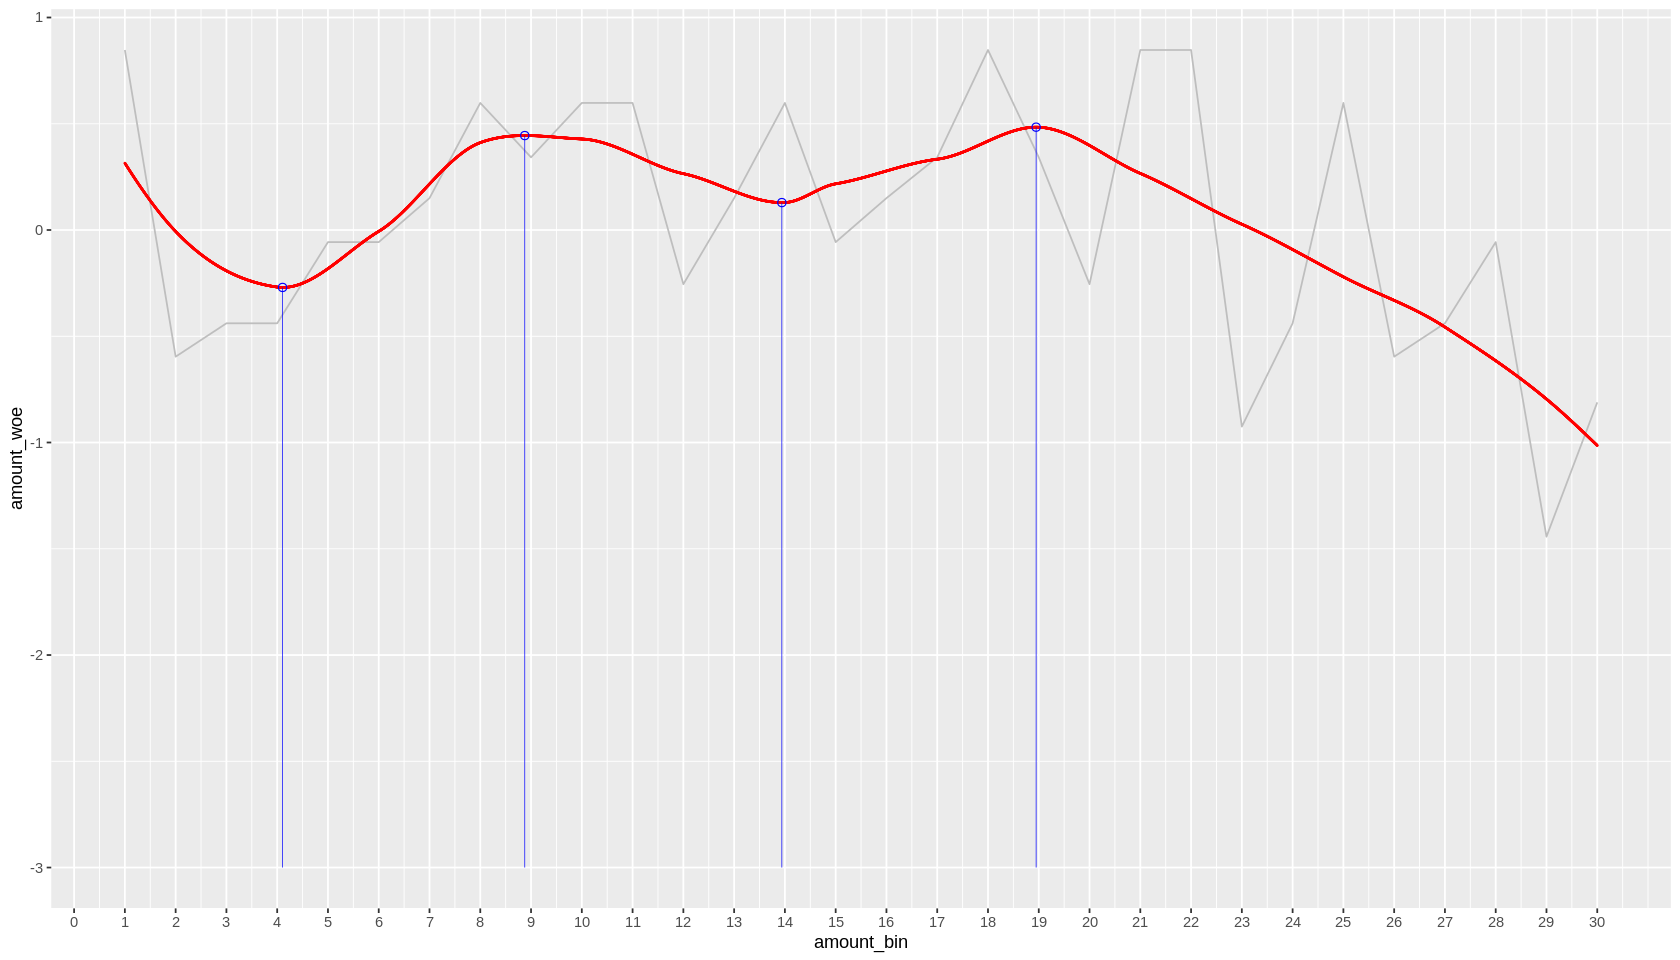

In [ ]:
## Smoothing -------------------------------------------------------------------
smoothing <- loess(amount_woe~amount_bin, span=0.4)
xl  <- seq(min(amount_bin),max(amount_bin), (max(amount_bin)-min(amount_bin))/10000)
out <- predict(smoothing, xl)
infl<- c(diff(diff(out)>0)!=0,F,F)

### Ploting =-------------------------------------------------------------------
#ggplot(data, aes(amount_bin,amount_woe)) + geom_path(color="gray") + geom_smooth(se=0)

### type1 ----
#plot(amount_bin, amount_woe, type="l")
#lines(xl, out, col='red', lwd=2)
#points(xl[infl ], out[infl ])

### type2 ----
sdata <- data.table(xl,out, infl)
options(repr.plot.width = 14, repr.plot.height = 8)
ggplot(data, aes(amount_bin,amount_woe)) + geom_path(color="gray") +
  geom_point(data=sdata, aes(xl, out), size=.1, color="red") +
  geom_point(data=sdata[infl], aes(xl, out), size=2, color="blue", shape=1) +
  geom_segment(data=sdata[infl], aes(x=xl, y=-3, xend=xl, yend=out),color='blue', size=0.2) +
  scale_x_continuous(breaks=seq(0, 30, 1))

In [ ]:
sdata[infl]

xl,out,infl
<dbl>,<dbl>,<lgl>
4.1059,-0.2702960,TRUE
8.8764,0.4444113,TRUE
13.9398,0.1290005,TRUE
18.9481,0.4839202,TRUE


1 구간 : 338 ~ 950

2 구간 : 951 ~ 1568

3 구간 : 1572 ~ 2235

4 구간 : 2238 ~ 3368

5 구간 : 3378 ~ 18424



- age

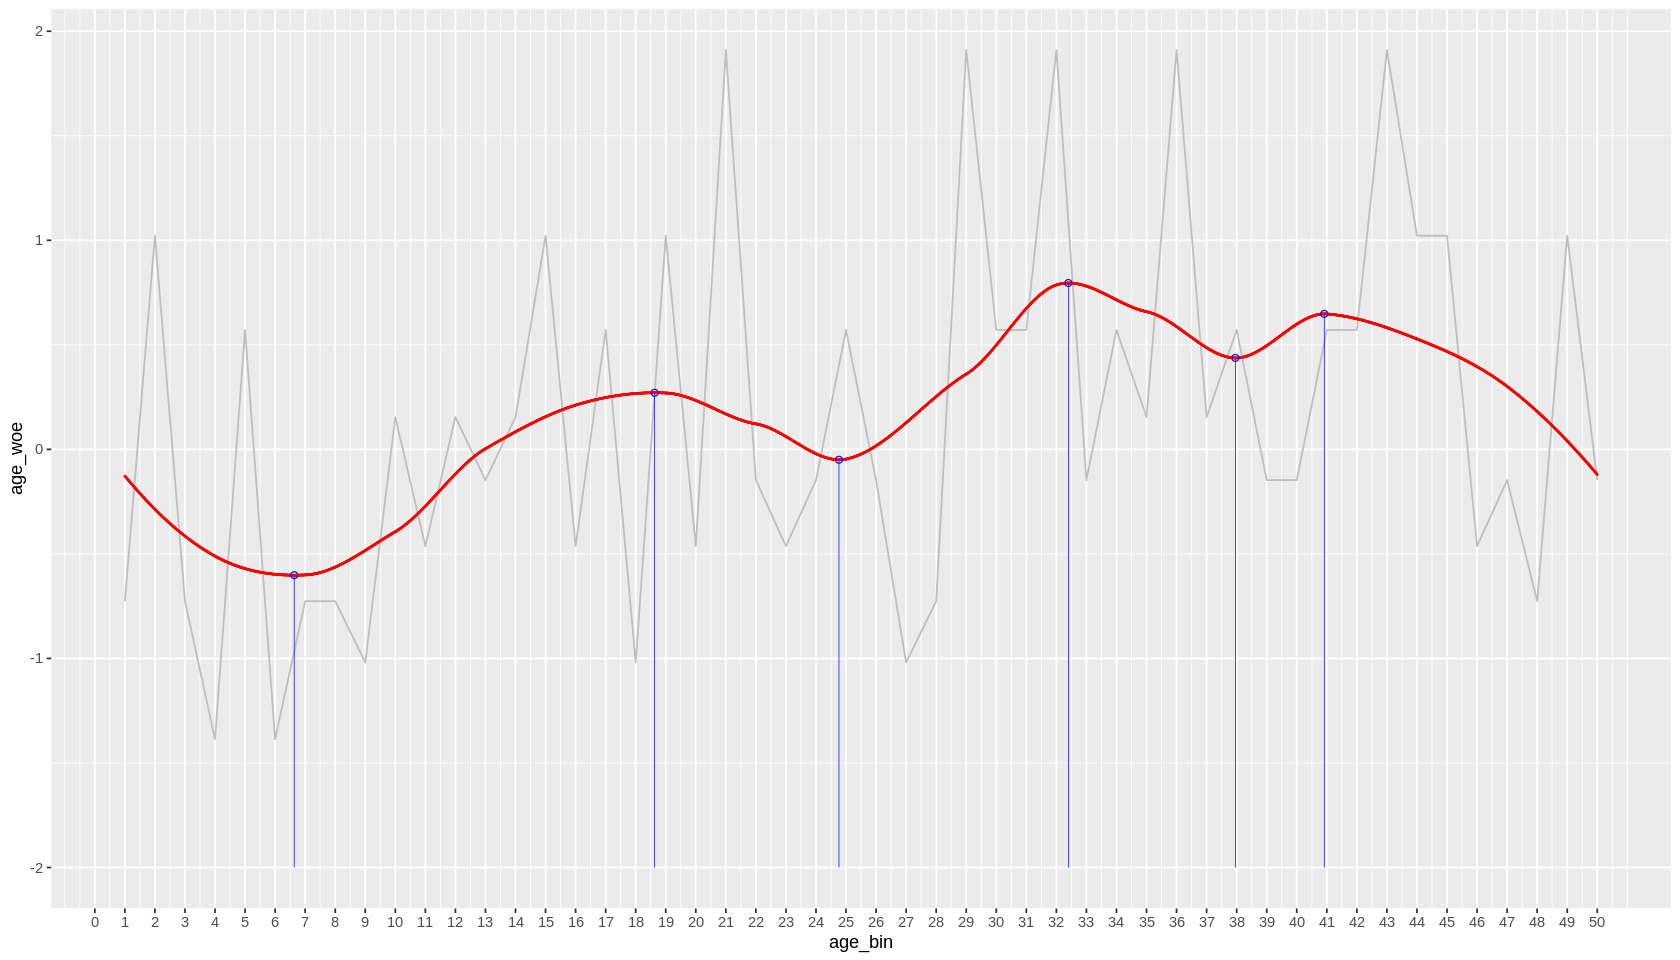

In [ ]:
## Smoothing -------------------------------------------------------------------
smoothing_age <- loess(age_woe~age_bin, span=0.4)
xl_age  <- seq(min(age_bin),max(age_bin), (max(age_bin)-min(age_bin))/5000)
out_age <- predict(smoothing_age, xl_age)
infl_age <- c(diff(diff(out_age)>0)!=0,F,F)

sdata_age <- data.table(xl_age,out_age, infl_age)
options(repr.plot.width = 14, repr.plot.height = 8)
ggplot(data_age, aes(age_bin,age_woe)) + geom_path(color="gray") +
  geom_point(data=sdata_age, aes(xl_age, out_age), size=.1, color="red") +
  geom_point(data=sdata_age[infl_age], aes(xl_age, out_age), size=1.6, color="blue", shape=1) +
  geom_segment(data=sdata_age[infl_age], aes(x=xl_age, y=-2, xend=xl_age, yend=out_age),color='blue', size=0.2) +
  scale_x_continuous(breaks=seq(0, 50, 1))

In [ ]:
sdata_age[infl_age]

xl_age,out_age,infl_age
<dbl>,<dbl>,<lgl>
6.6350,-0.60164401,TRUE
18.6302,0.27076331,TRUE
24.7650,-0.04963364,TRUE
32.3992,0.79556124,TRUE
37.9558,0.43715097,TRUE
40.9154,0.64796806,TRUE


1 구간 : 19 ~ 24

2 구간 : 25 ~ 29

3 구간 : 30 ~ 32

4 구간 : 33 ~ 36

5 구간 : 37 ~ 40

6 구간 : 41 ~ 44

7 구간 : 45 ~ 75

- duration

Warning message in as.data.table.list(x, keep.rownames = keep.rownames, check.names = check.names, :
“Item 1 has 3001 rows but longest item has 10001; recycled with remainder.”
Warning message:
“Removed 7071 rows containing missing values (geom_point).”


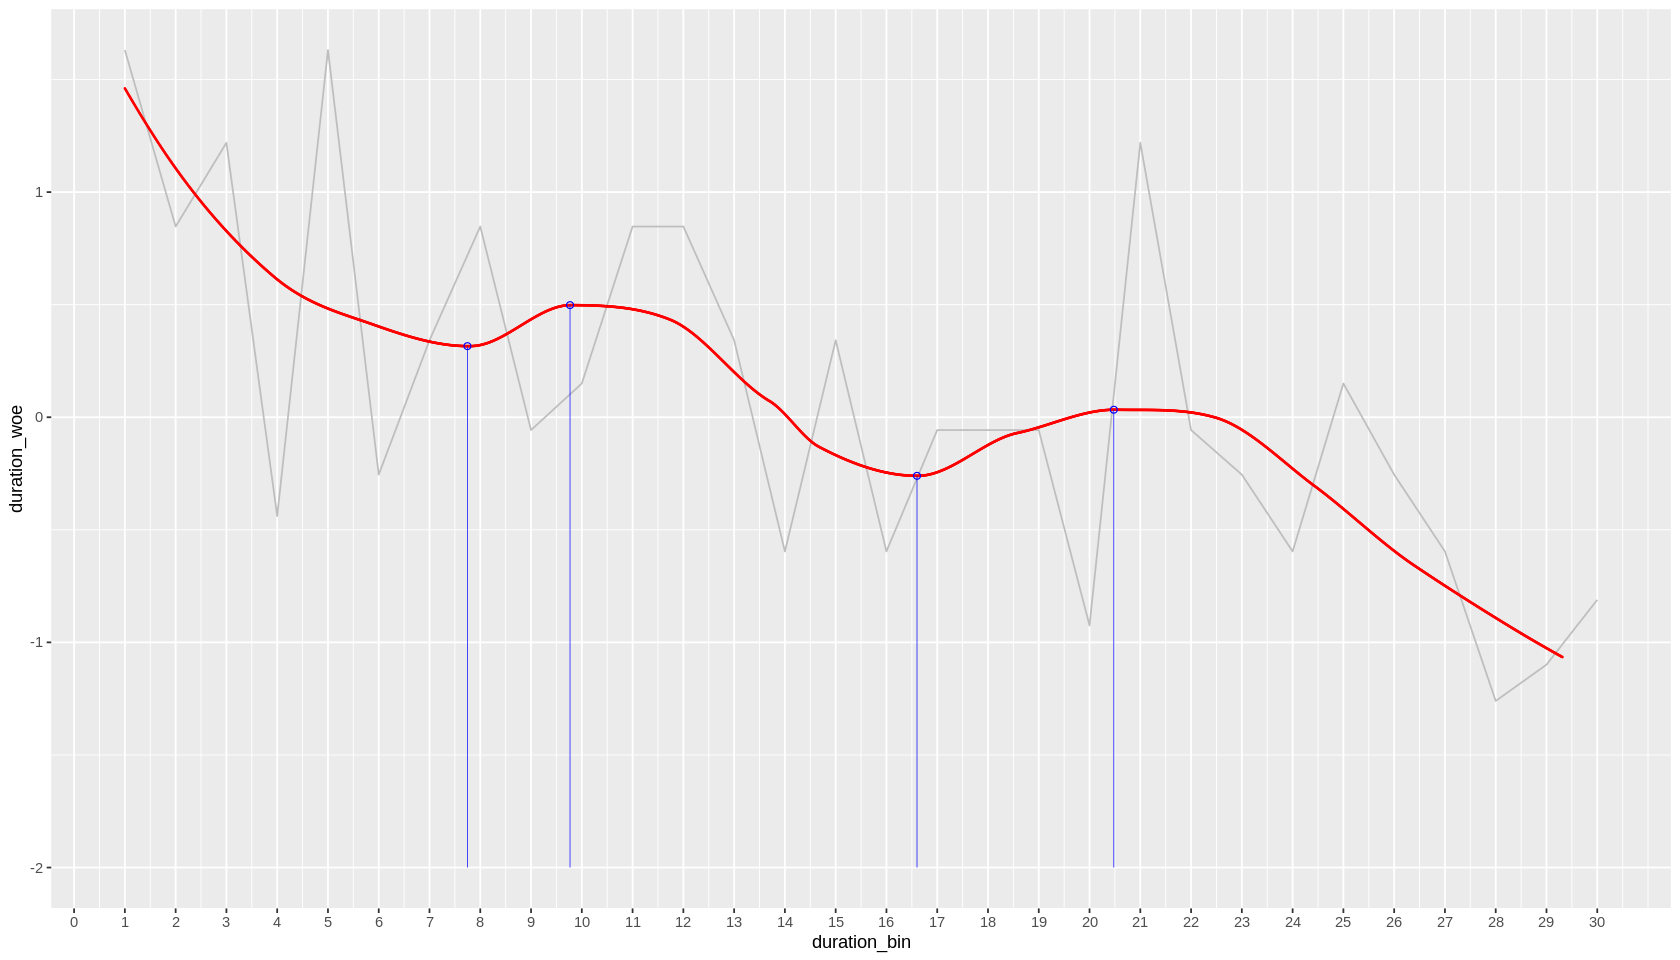

In [ ]:
## Smoothing -------------------------------------------------------------------
smoothing_duration <- loess(duration_woe~duration_bin, span=0.4)
xl_duration  <- seq(min(duration_bin),max(duration_bin), (max(duration_bin)-min(duration_bin))/3000)
out_duration <- predict(smoothing_duration, xl)
infl_duration <- c(diff(diff(out_duration)>0)!=0,F,F)

sdata_duration <- data.table(xl_duration,out_duration,infl_duration)
options(repr.plot.width = 14, repr.plot.height = 8)
ggplot(data_duration, aes(duration_bin,duration_woe)) + geom_path(color="gray") +
  geom_point(data=sdata_duration, aes(xl_duration, out_duration), size=.1, color="red") +
  geom_point(data=sdata_duration[infl_duration], aes(xl_duration, out_duration), size=1.6, color="blue", shape=1) +
  geom_segment(data=sdata_duration[infl_duration], aes(x=xl_duration, y=-2, xend=xl_duration, yend=out_duration),color='blue', size=0.2) +
  scale_x_continuous(breaks=seq(0, 30, 1))

In [ ]:
sdata_duration[infl_duration]

xl_duration,out_duration,infl_duration
<dbl>,<dbl>,<lgl>
7.747333,0.31584259,TRUE
9.767667,0.49800775,TRUE
16.602000,-0.26029713,TRUE
20.478333,0.03333306,TRUE


1 구간 : 4 ~ 12

2 구간 : 13 ~ 20

3 구간 : 21 ~ 24

4 구간 : 27 ~ 72



- woebin 코드 이용  

tree-like segmentation or chi-square merge

In [ ]:
bins = woebin(cr_dt, y = 'good.bad')

[INFO] creating woe binning ... 


In [ ]:
bins$age %>%
  knitr::kable()
 



|variable |bin       | count| count_distr| good| bad|   badprob|        woe|    bin_iv|  total_iv|breaks |is_special_values |
|:--------|:---------|-----:|-----------:|----:|---:|---------:|----------:|---------:|---------:|:------|:-----------------|
|age      |[-Inf,26) |   190|       0.190|   80| 110| 0.5789474| -0.5288441| 0.0579210| 0.1304985|26     |FALSE             |
|age      |[26,28)   |   101|       0.101|   27|  74| 0.7326733|  0.1609304| 0.0025289| 0.1304985|28     |FALSE             |
|age      |[28,35)   |   257|       0.257|   85| 172| 0.6692607| -0.1424546| 0.0053590| 0.1304985|35     |FALSE             |
|age      |[35,37)   |    79|       0.079|   12|  67| 0.8481013|  0.8724881| 0.0486101| 0.1304985|37     |FALSE             |
|age      |[37, Inf) |   373|       0.373|   96| 277| 0.7426273|  0.2123715| 0.0160796| 0.1304985|Inf    |FALSE             |

- numeric 변수 binning

$duration


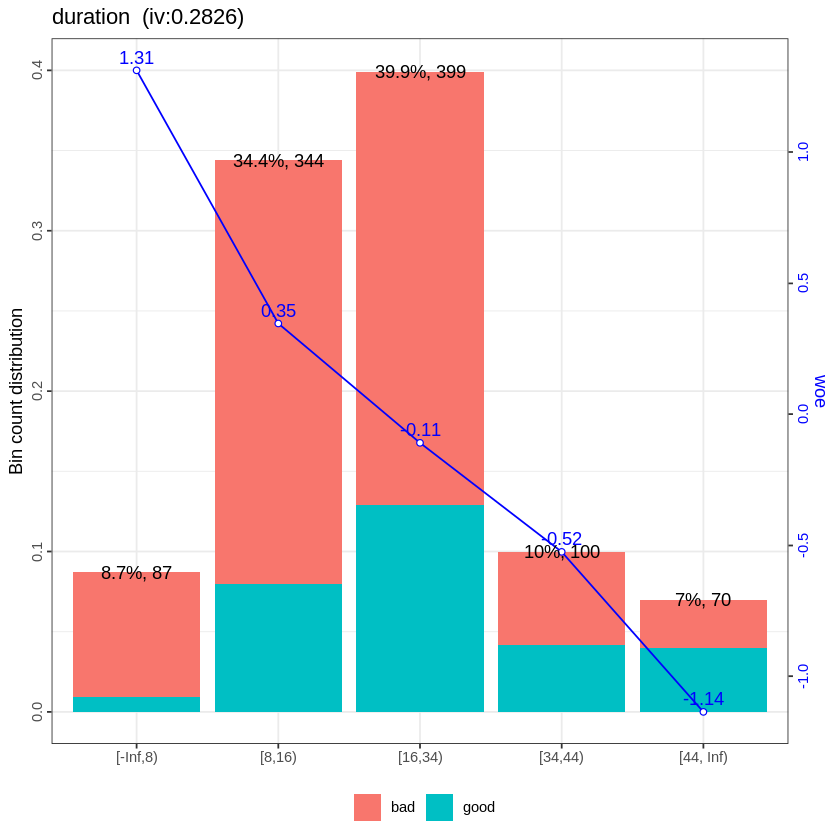

In [ ]:
woebin_plot(bins$duration, line_value = 'woe')

-  duration

  4 ~ 7 : 1

  8 ~ 15 : 2

  16 ~ 33 : 3

  34 ~ 43 : 4
  
  44 ~ 72 : 5

  

$amount


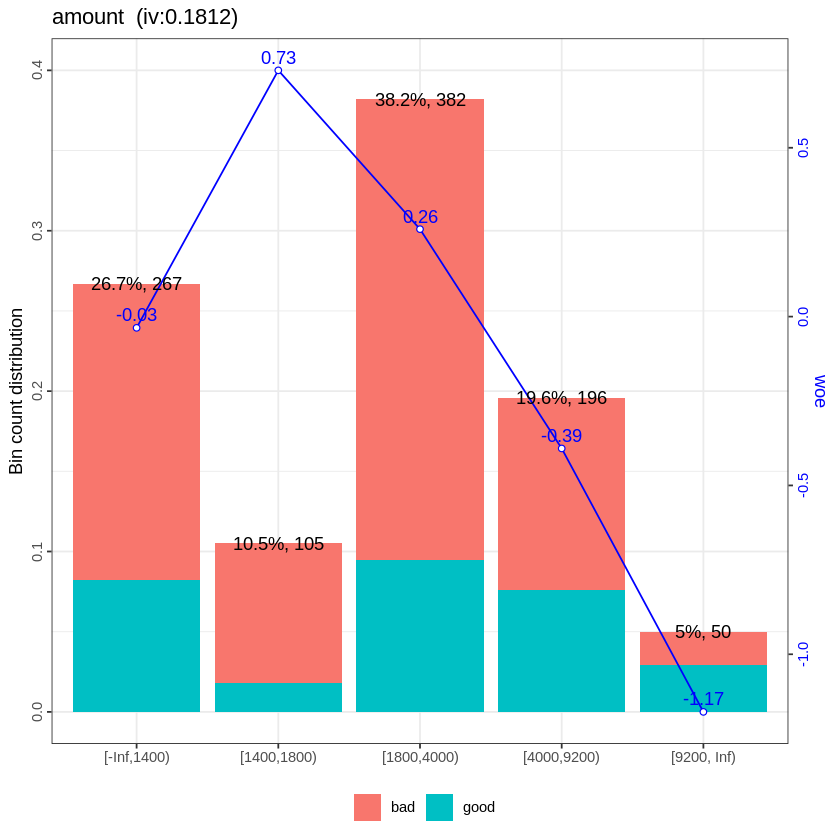

In [ ]:
woebin_plot(bins$amount, line_value = 'woe')

-  amount

  250 ~ 1400 : 1

  1400 ~ 1800 : 2

  1800 ~ 4000 : 3

  4000 ~ 9200 : 4
  
  9200 ~ 18424 : 5


$age


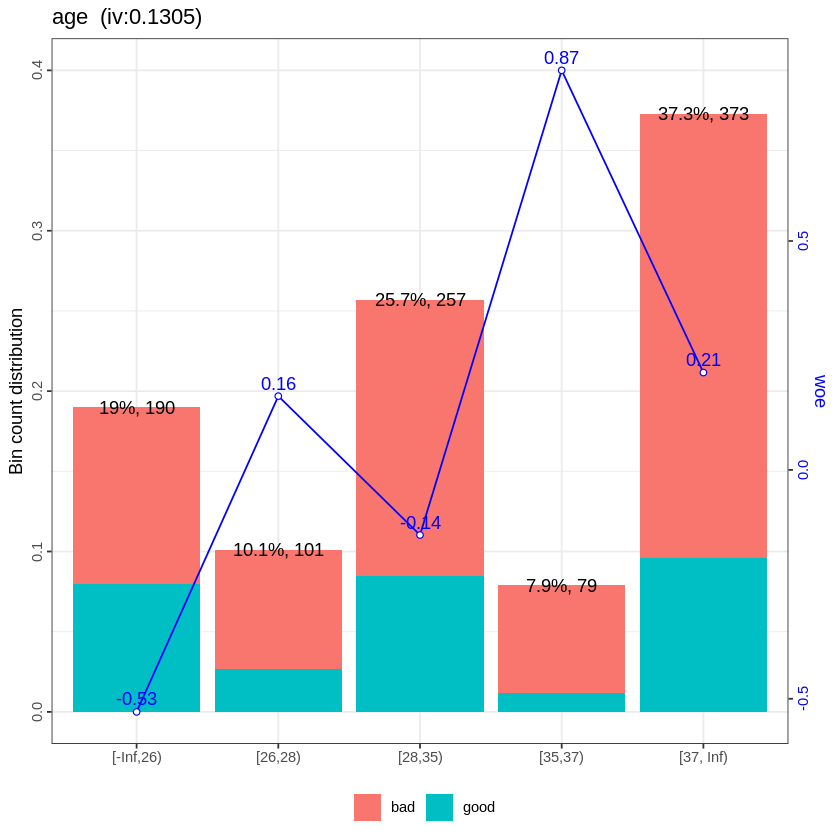

In [ ]:
woebin_plot(bins$age, line_value = 'woe')

-  age

  19 ~ 25 : 1

  26 ~ 27 : 2

  28 ~ 34 : 3

 35 ~ 36 : 4
  
  37 ~ 74 : 5

$depends


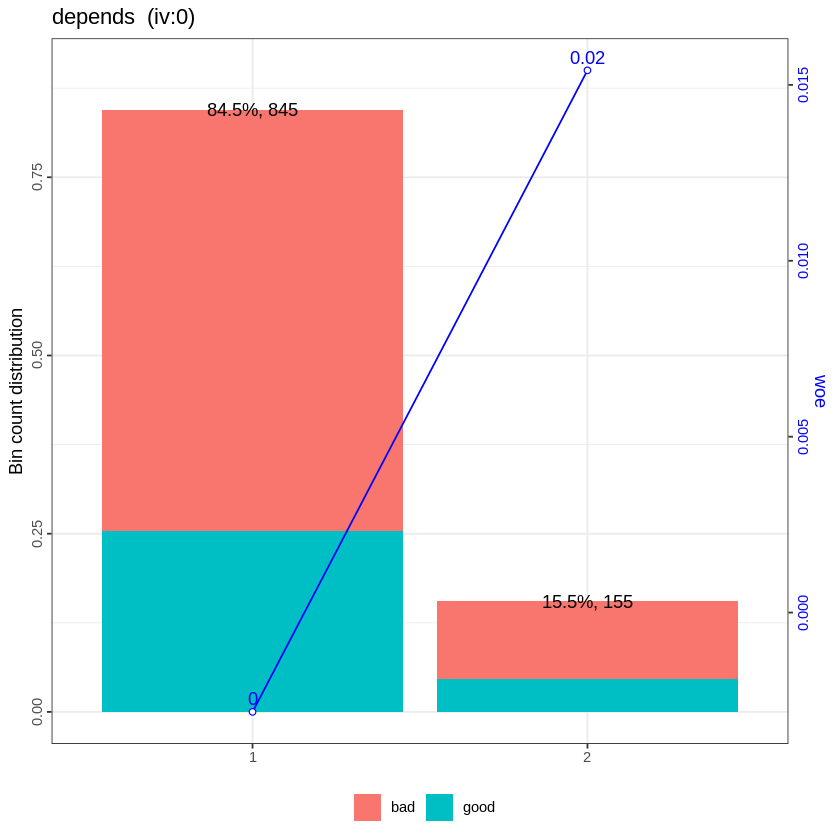

In [ ]:
woebin_plot(bins$depends, line_value = 'woe')

$existcr


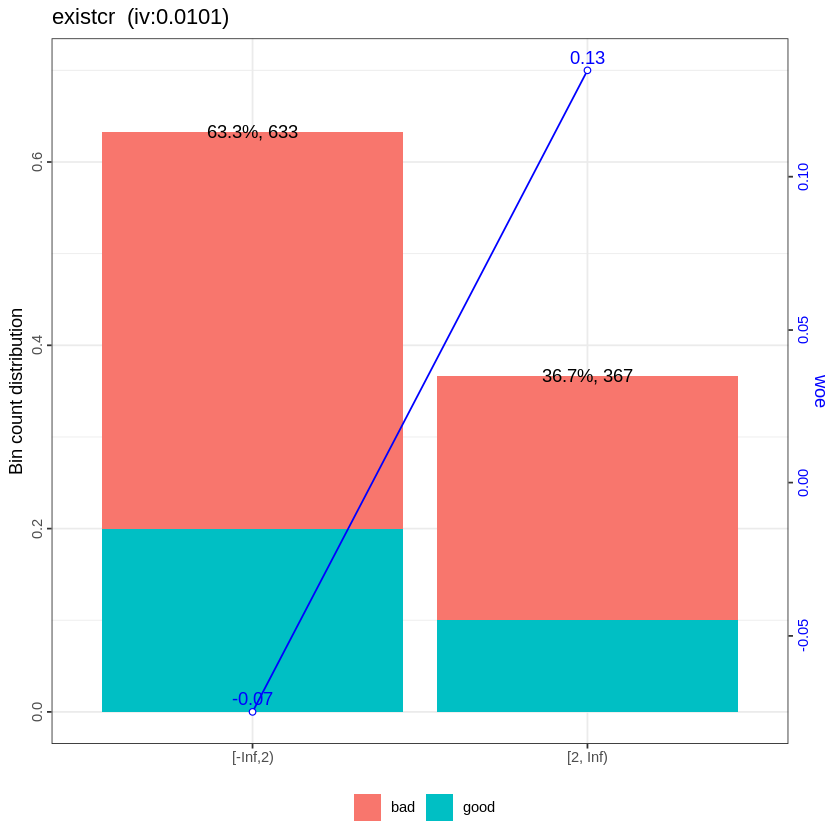

In [ ]:
woebin_plot(bins$existcr, line_value = 'woe')

- factor 변수

$checking


$history


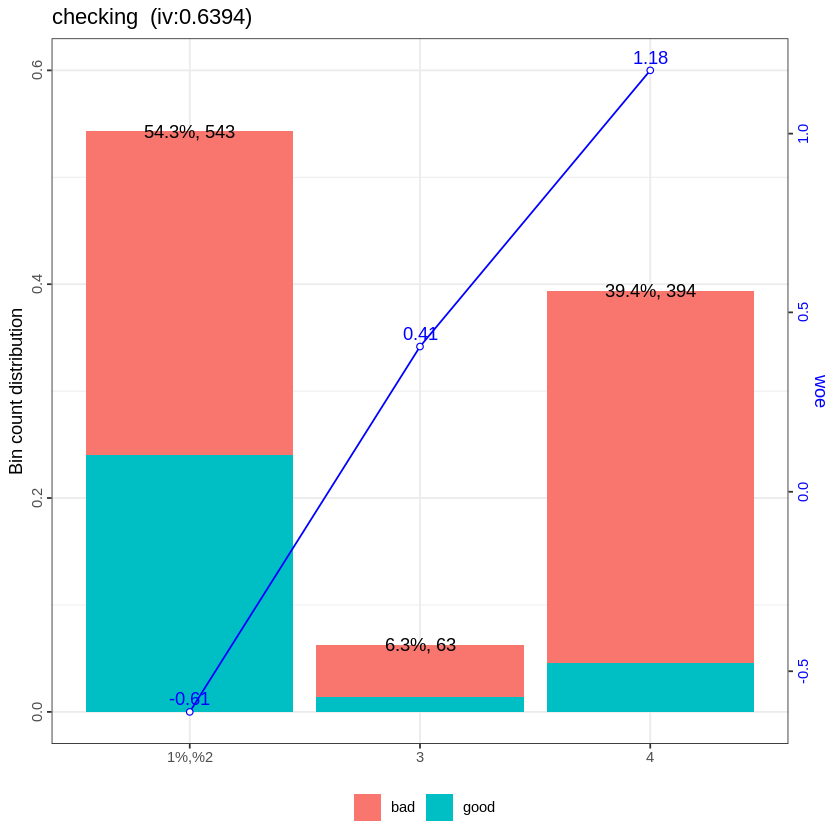

$purpose


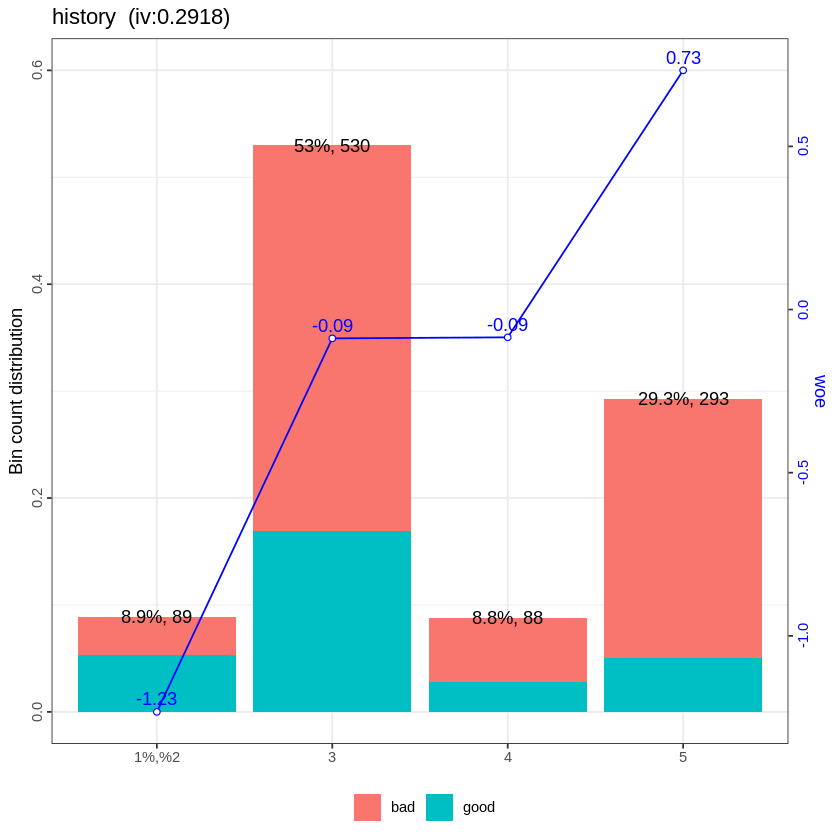

$savings


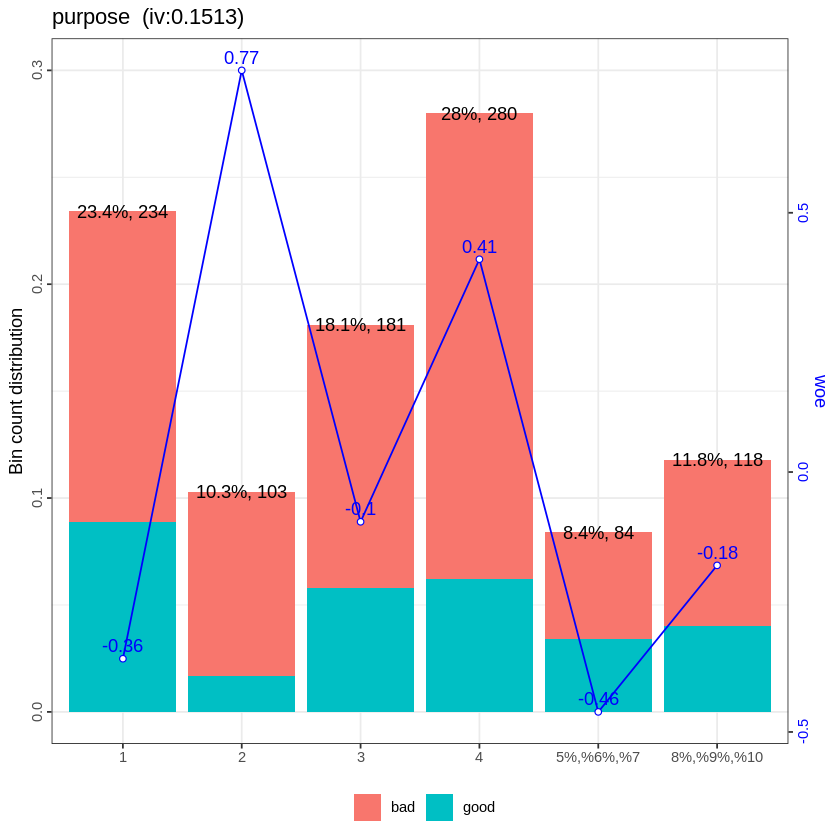

$employed


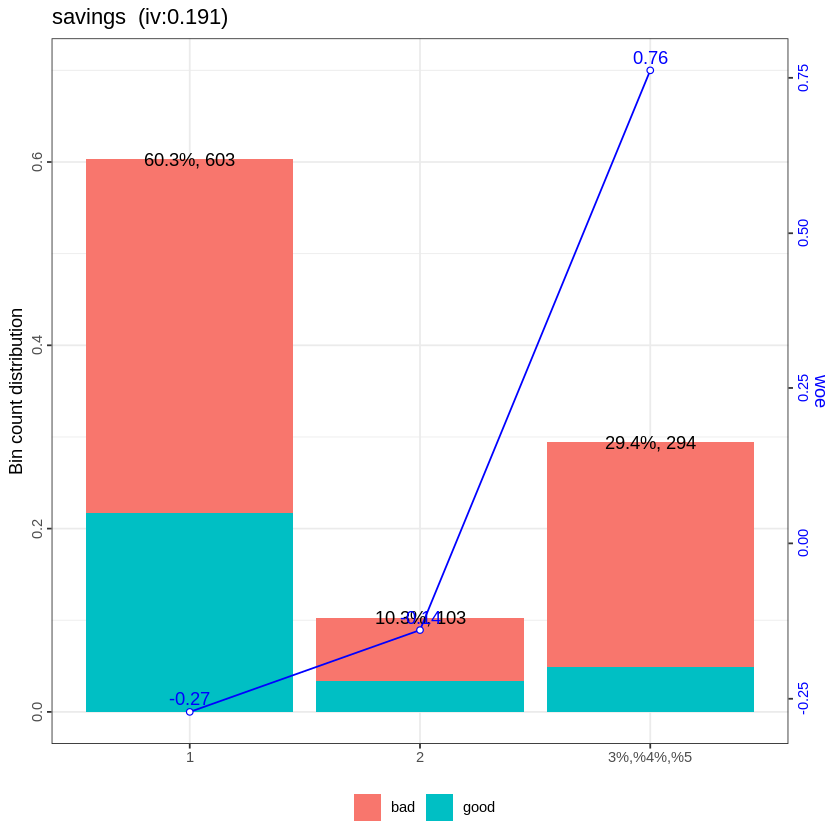

$installp


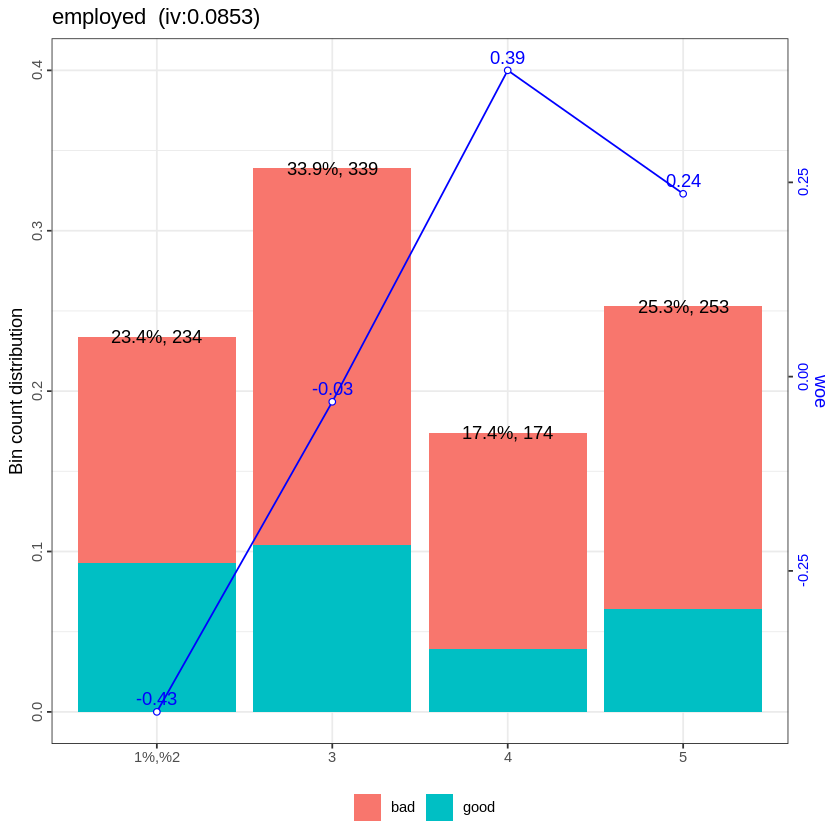

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”


$martial


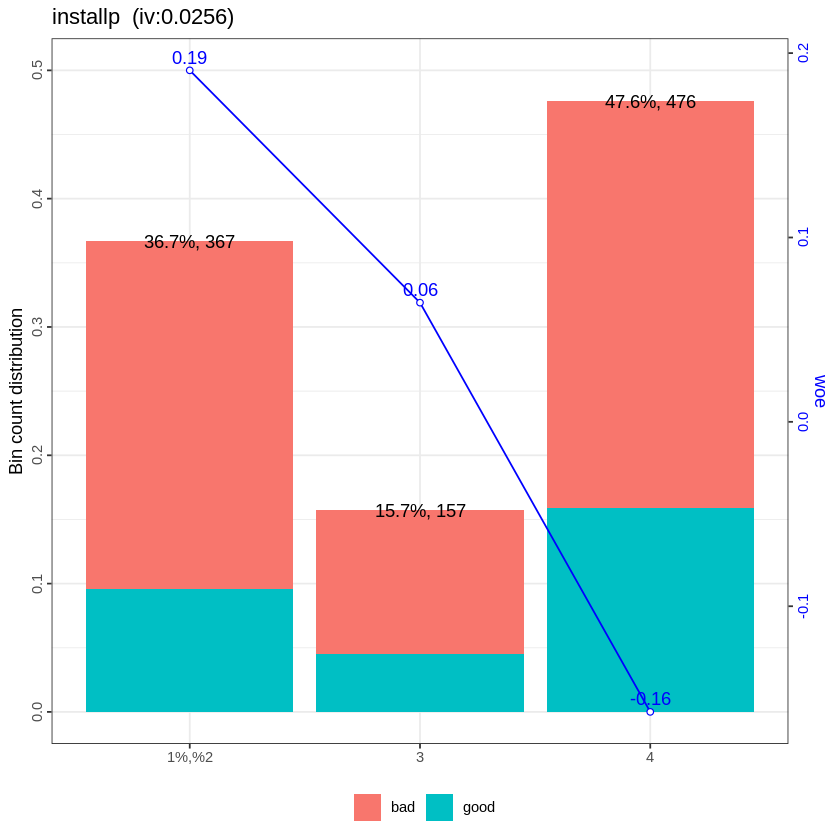

$coapp


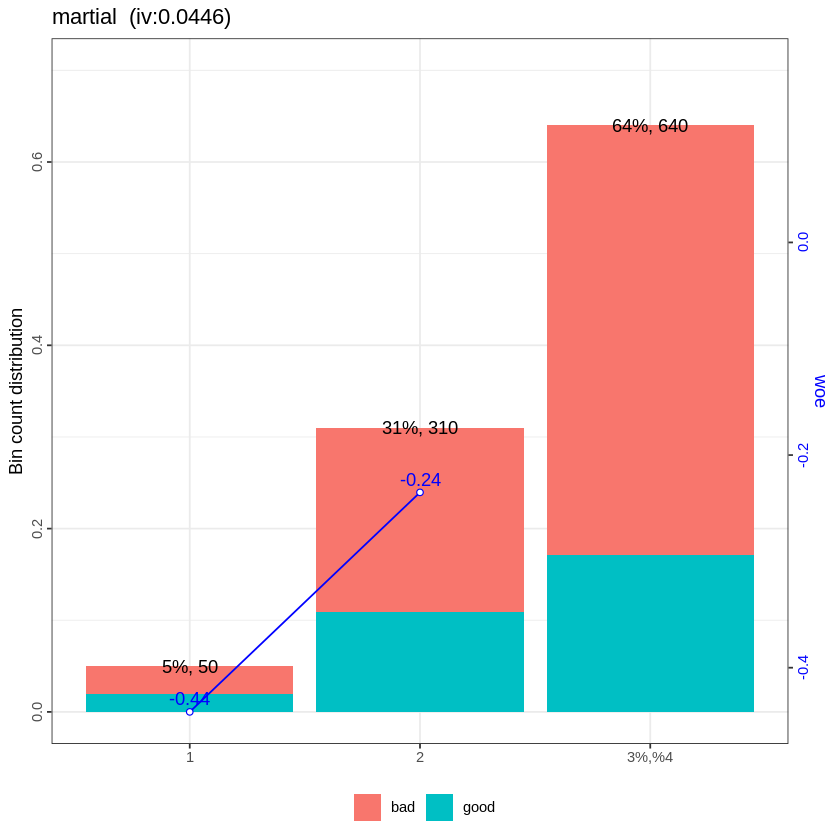

$resident


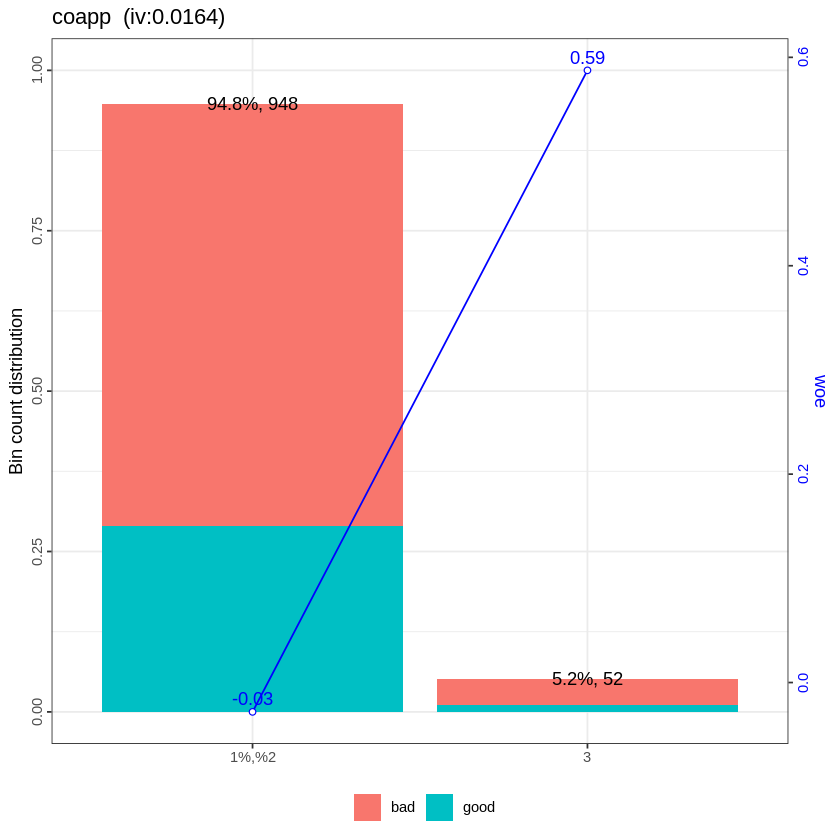

$property


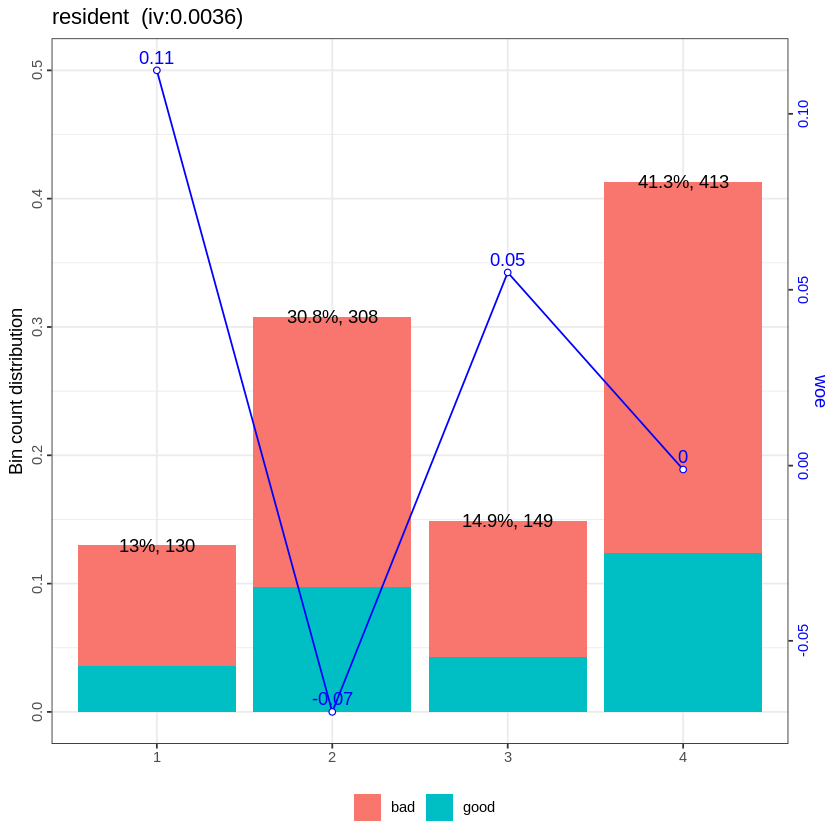

$other


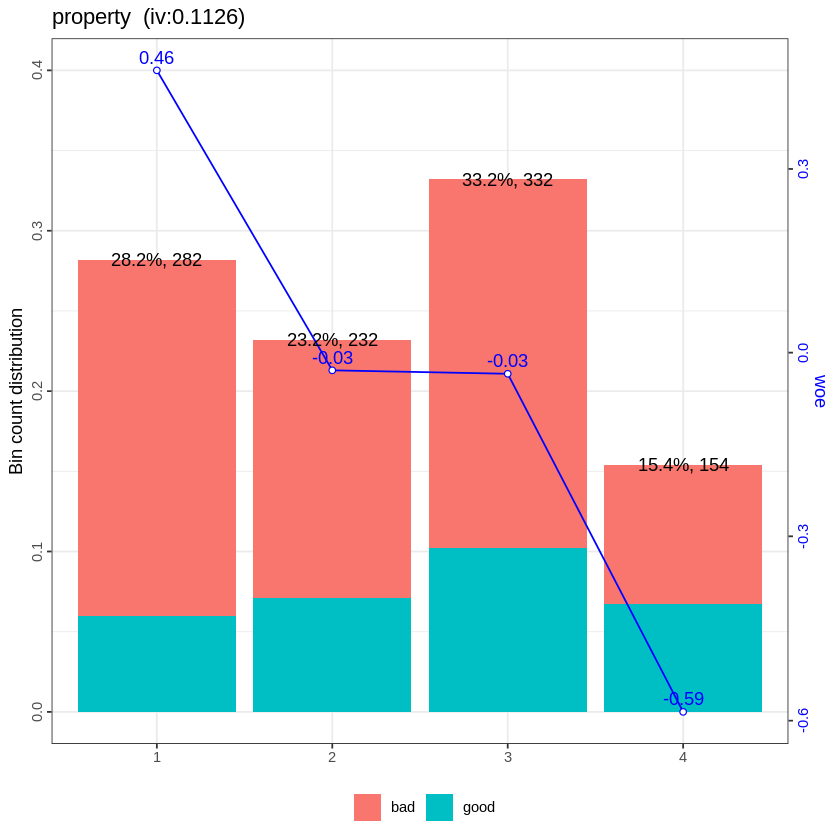

$housing


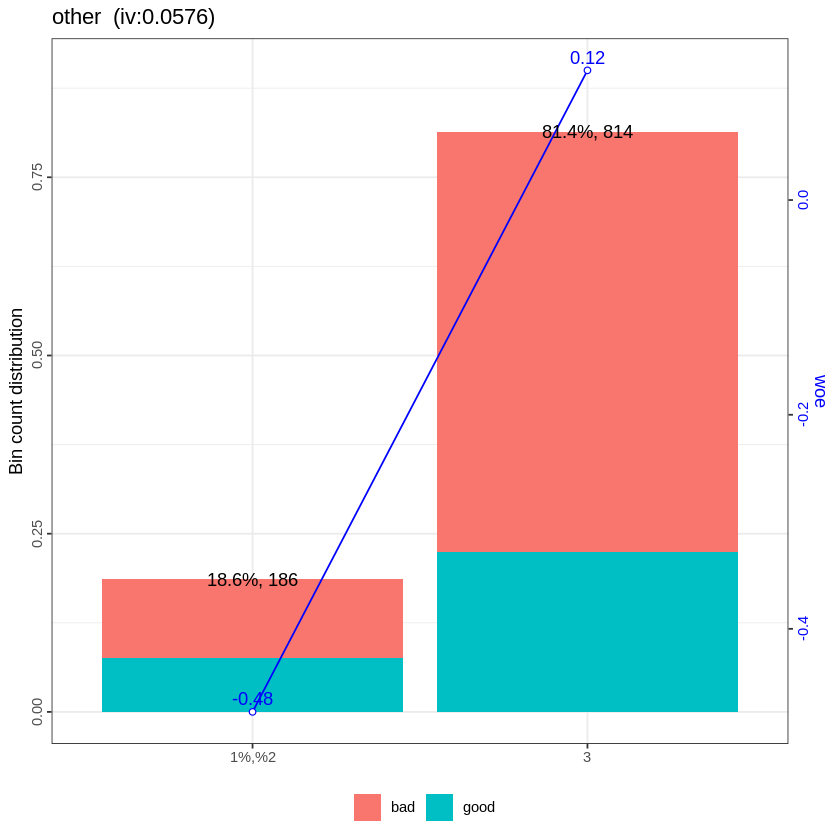

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”


$job


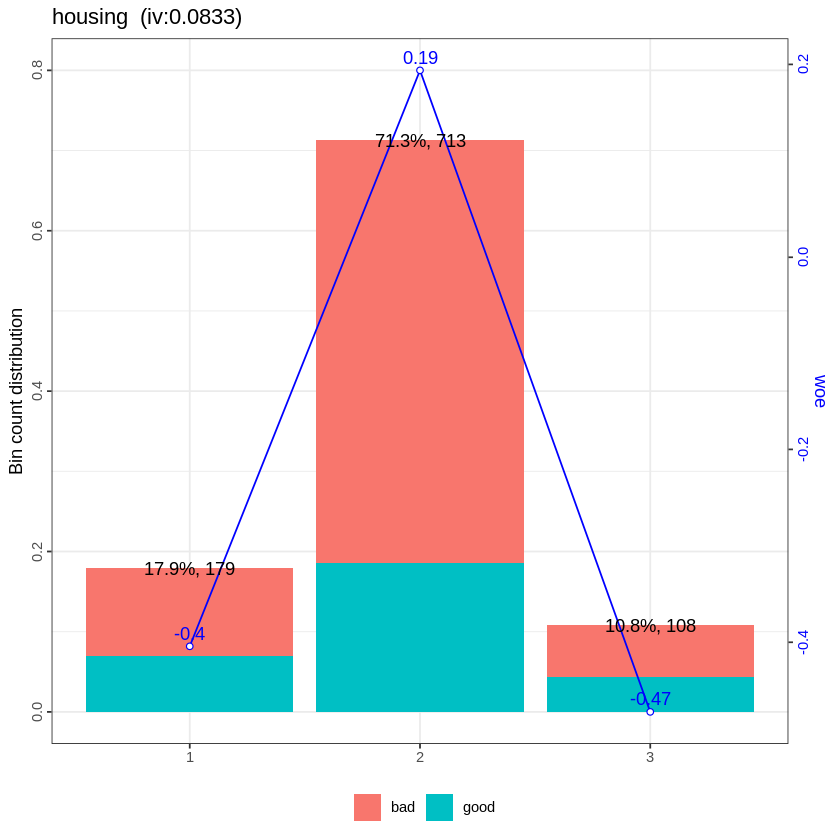

$telephon


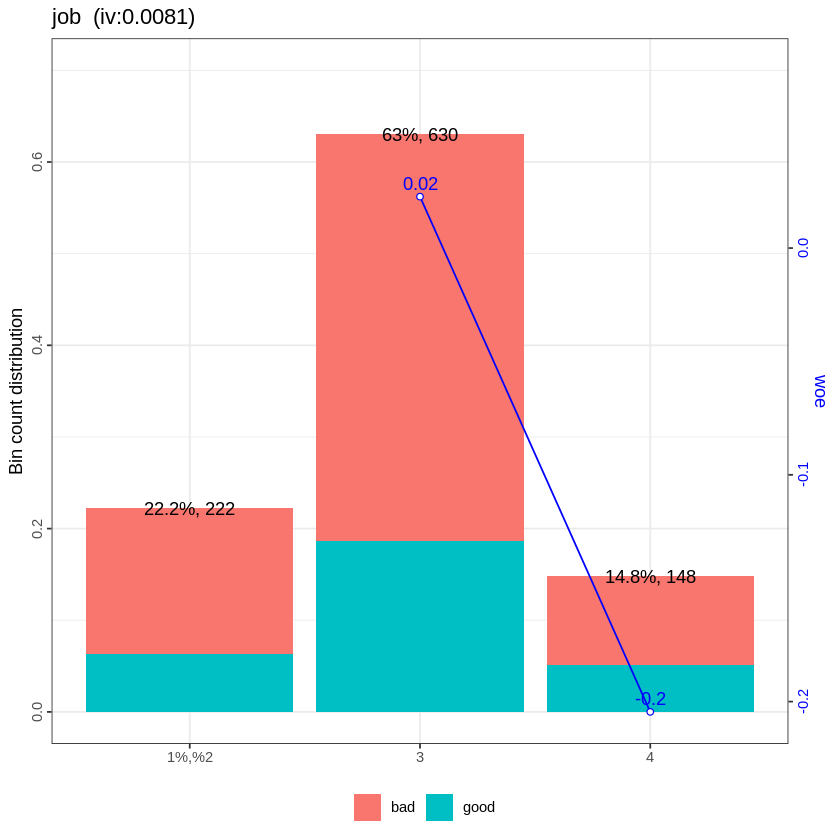

Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”


$foreign


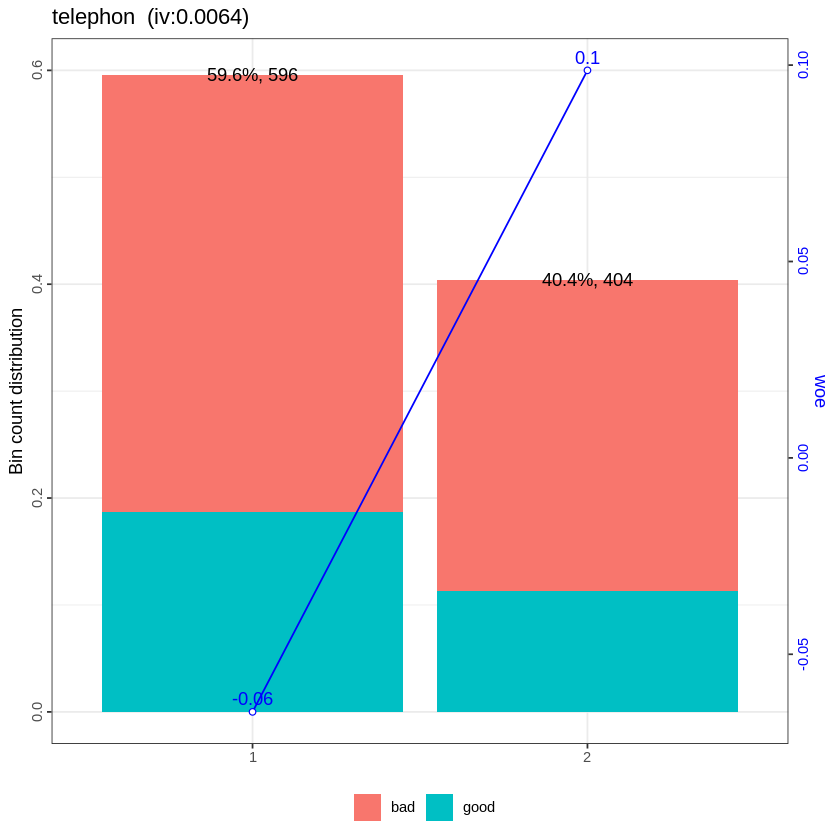

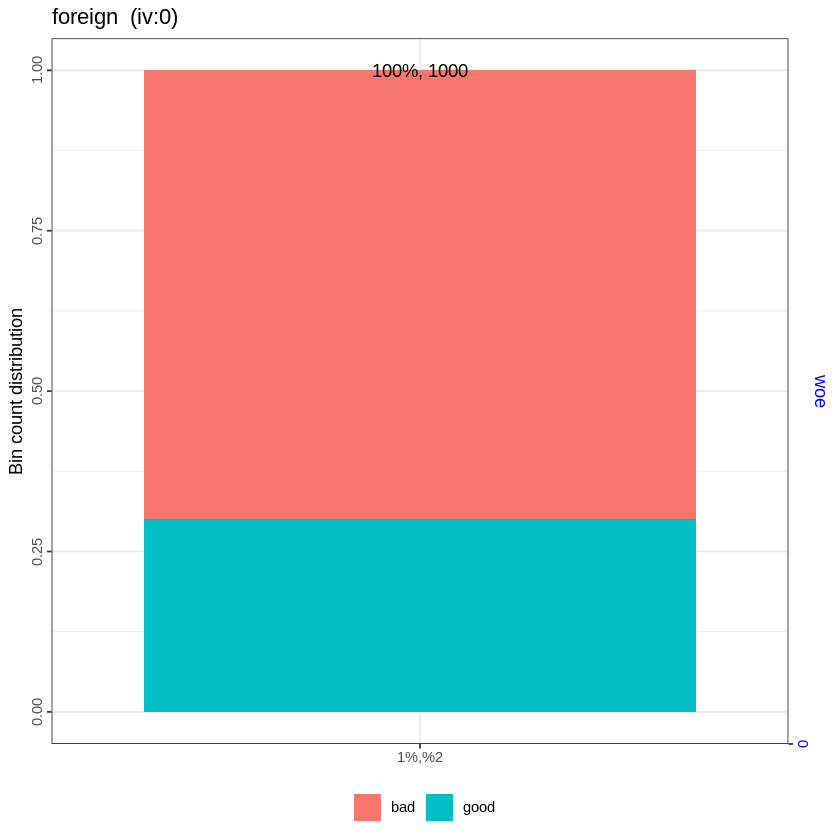

In [ ]:
par(mfrow=c(2,2))
woebin_plot(bins$checking, line_value = 'woe') 
woebin_plot(bins$history, line_value = 'woe')
woebin_plot(bins$purpose, line_value = 'woe')
woebin_plot(bins$savings, line_value = 'woe')
woebin_plot(bins$employed, line_value = 'woe')
woebin_plot(bins$installp, line_value = 'woe') 
woebin_plot(bins$martial, line_value = 'woe')
woebin_plot(bins$coapp, line_value = 'woe')
woebin_plot(bins$resident, line_value = 'woe')
woebin_plot(bins$property, line_value = 'woe')
woebin_plot(bins$other, line_value = 'woe')
woebin_plot(bins$housing, line_value = 'woe')
woebin_plot(bins$job, line_value = 'woe')
woebin_plot(bins$telephon, line_value = 'woe')
woebin_plot(bins$foreign, line_value = 'woe')
